In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#### GET SYNTHETIC DATA

In [2]:
#### GET SYNTHETIC DATA
synthe_X_num = np.load('tab-ddpm/tab-ddpm-main/exp/options/ddpm_cb_best/X_num_train.npy')


## UNCOMMENT IF DATATSET HAS CAT VALUES
'''
# Pick_allow disabled causing error. 
# Workaround to get X_cat

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
synthe_X_cat = np.load('tab-ddpm/tab-ddpm-main/exp/options/ddpm_cb_best/X_cat_train.npy')

# restore np.load for future normal usage
np.load = np_load_old

synthe_X = np.append(synthe_X_num, synthe_X_cat, axis=1)
'''

# If Cat value in dataset, change synthe_X_num to synthe_X
synthe_X_df = pd.DataFrame(synthe_X_num,
    columns = ['[UNDERLYING_LAST]', '[STRIKE]', '[STRIKE_DISTANCE_PCT]', '[DTE]', '[C_DELTA]',
       '[C_GAMMA]', '[C_VEGA]', '[C_THETA]', '[C_RHO]', '[C_VOLUME]', '[C_SIZE1]', '[C_SIZE2]',
       '[C_BID]', '[C_ASK]'])

synthe_y = np.load('tab-ddpm/tab-ddpm-main/exp/options/ddpm_cb_best/y_train.npy')

In [3]:
synthe_X_df.loc[:, '[DTE]'] = synthe_X_df['[DTE]'].round()
synthe_X_df.loc[:, '[STRIKE]'] = synthe_X_df['[STRIKE]'].round()
print(synthe_X_df.shape)
synthe_X_df[-210:-205]

(168738, 14)


,[UNDERLYING_LAST],[STRIKE],[STRIKE_DISTANCE_PCT],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_VOLUME],[C_SIZE1],[C_SIZE2],[C_BID],[C_ASK]
168528,4726.550000,4230.0,0.109000,9.0,0.980898,0.000210,0.308433,-0.844647,0.924087,0.0,0.0,0.0,539.441695,529.056735
168529,3749.872302,3640.0,0.024000,22.0,0.656513,0.001405,3.425164,-2.415332,1.468948,1.0,10.0,8.0,161.018481,159.793014
168530,4347.210000,100.0,1.017000,0.0,0.390832,-0.000040,-21409.999980,-86.507725,-12091.224910,0.0,0.0,0.0,4510.500000,4516.600000
168531,3901.380000,2900.0,0.231405,43.0,1.000000,-0.000034,0.000000,-0.239162,5.034044,0.0,15.0,15.0,1025.354059,1088.567099
168532,3576.900000,100.0,1.017000,28.0,0.000000,-0.000040,8.131681,0.000000,0.851922,0.0,0.0,0.0,4510.500000,4516.600000


In [4]:
synthe_X_df['[C_IV]'] = synthe_y

In [5]:
synthe_X_df = synthe_X_df.loc[synthe_X_df['[DTE]'] != 0]
synthe_X_df = synthe_X_df.sort_values(by=['[DTE]', '[STRIKE]', '[UNDERLYING_LAST]'])

In [6]:
synthe_X_df.sort_values(by=['[DTE]', '[STRIKE]', '[UNDERLYING_LAST]'])

,[UNDERLYING_LAST],[STRIKE],[STRIKE_DISTANCE_PCT],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_VOLUME],[C_SIZE1],[C_SIZE2],[C_BID],[C_ASK],[C_IV]
2442,3576.90,100.0,1.017000,1.0,1.000000,-0.000040,-21409.999980,-0.009996,39.552029,43531.000000,1402.122242,0.000000,4510.500000,4516.600000,-0.000500
5539,3576.90,100.0,1.015863,1.0,1.000000,-0.000040,-21409.999980,-0.040308,10.590124,0.000000,30.000000,0.000000,1342.612384,1683.313456,-0.000500
7503,3576.90,100.0,0.000000,1.0,0.047192,0.725350,0.107115,-10.738332,0.568830,43531.000000,7.000000,0.000000,0.000000,0.150000,-0.000500
13254,3576.90,100.0,1.017000,1.0,1.000000,-0.000039,-21409.999980,-0.025356,0.610994,23446.586858,165.730864,72.000000,4510.500000,4516.600000,-0.000500
14511,3576.90,100.0,1.017000,1.0,1.000000,-0.000040,-21409.999980,-0.305827,0.000966,43468.965980,0.000000,0.000000,4510.500000,4516.600000,49.870940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168205,4795.57,7600.0,1.017000,1824.0,0.000000,-0.000040,0.109639,0.000000,1062.929560,43531.000000,0.000000,0.000000,0.000000,0.050000,49.870940
168263,4795.57,7600.0,0.986088,1824.0,0.000000,-0.000040,-21409.999980,0.000000,-12091.224910,0.000000,8334.000000,0.000000,0.000000,0.050000,-0.000500
168296,4795.57,7600.0,0.000000,1824.0,1.000000,-0.000040,1578.948130,0.000000,1062.929560,43531.000000,8334.000000,0.000000,4510.500000,4516.600000,-0.000500
168419,4795.57,7600.0,1.017000,1824.0,0.000000,-0.000040,-21238.701834,0.000000,-12077.821633,1980.903343,0.000000,2936.981169,0.000000,68.307761,49.811749


In [7]:
synthe_X_df

,[UNDERLYING_LAST],[STRIKE],[STRIKE_DISTANCE_PCT],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_VOLUME],[C_SIZE1],[C_SIZE2],[C_BID],[C_ASK],[C_IV]
2442,3576.90,100.0,1.017000,1.0,1.000000,-0.000040,-21409.999980,-0.009996,39.552029,43531.000000,1402.122242,0.000000,4510.500000,4516.600000,-0.000500
5539,3576.90,100.0,1.015863,1.0,1.000000,-0.000040,-21409.999980,-0.040308,10.590124,0.000000,30.000000,0.000000,1342.612384,1683.313456,-0.000500
7503,3576.90,100.0,0.000000,1.0,0.047192,0.725350,0.107115,-10.738332,0.568830,43531.000000,7.000000,0.000000,0.000000,0.150000,-0.000500
13254,3576.90,100.0,1.017000,1.0,1.000000,-0.000039,-21409.999980,-0.025356,0.610994,23446.586858,165.730864,72.000000,4510.500000,4516.600000,-0.000500
14511,3576.90,100.0,1.017000,1.0,1.000000,-0.000040,-21409.999980,-0.305827,0.000966,43468.965980,0.000000,0.000000,4510.500000,4516.600000,49.870940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168205,4795.57,7600.0,1.017000,1824.0,0.000000,-0.000040,0.109639,0.000000,1062.929560,43531.000000,0.000000,0.000000,0.000000,0.050000,49.870940
168263,4795.57,7600.0,0.986088,1824.0,0.000000,-0.000040,-21409.999980,0.000000,-12091.224910,0.000000,8334.000000,0.000000,0.000000,0.050000,-0.000500
168296,4795.57,7600.0,0.000000,1824.0,1.000000,-0.000040,1578.948130,0.000000,1062.929560,43531.000000,8334.000000,0.000000,4510.500000,4516.600000,-0.000500
168419,4795.57,7600.0,1.017000,1824.0,0.000000,-0.000040,-21238.701834,0.000000,-12077.821633,1980.903343,0.000000,2936.981169,0.000000,68.307761,49.811749


In [8]:
type(synthe_y)

numpy.ndarray

In [9]:
synthe_X_df.loc[synthe_X_df['[DTE]'] != 0]

,[UNDERLYING_LAST],[STRIKE],[STRIKE_DISTANCE_PCT],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_VOLUME],[C_SIZE1],[C_SIZE2],[C_BID],[C_ASK],[C_IV]
2442,3576.90,100.0,1.017000,1.0,1.000000,-0.000040,-21409.999980,-0.009996,39.552029,43531.000000,1402.122242,0.000000,4510.500000,4516.600000,-0.000500
5539,3576.90,100.0,1.015863,1.0,1.000000,-0.000040,-21409.999980,-0.040308,10.590124,0.000000,30.000000,0.000000,1342.612384,1683.313456,-0.000500
7503,3576.90,100.0,0.000000,1.0,0.047192,0.725350,0.107115,-10.738332,0.568830,43531.000000,7.000000,0.000000,0.000000,0.150000,-0.000500
13254,3576.90,100.0,1.017000,1.0,1.000000,-0.000039,-21409.999980,-0.025356,0.610994,23446.586858,165.730864,72.000000,4510.500000,4516.600000,-0.000500
14511,3576.90,100.0,1.017000,1.0,1.000000,-0.000040,-21409.999980,-0.305827,0.000966,43468.965980,0.000000,0.000000,4510.500000,4516.600000,49.870940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168205,4795.57,7600.0,1.017000,1824.0,0.000000,-0.000040,0.109639,0.000000,1062.929560,43531.000000,0.000000,0.000000,0.000000,0.050000,49.870940
168263,4795.57,7600.0,0.986088,1824.0,0.000000,-0.000040,-21409.999980,0.000000,-12091.224910,0.000000,8334.000000,0.000000,0.000000,0.050000,-0.000500
168296,4795.57,7600.0,0.000000,1824.0,1.000000,-0.000040,1578.948130,0.000000,1062.929560,43531.000000,8334.000000,0.000000,4510.500000,4516.600000,-0.000500
168419,4795.57,7600.0,1.017000,1824.0,0.000000,-0.000040,-21238.701834,0.000000,-12077.821633,1980.903343,0.000000,2936.981169,0.000000,68.307761,49.811749


#### Get Val dataframe

In [10]:
X_val = np.load('tab-ddpm/tab-ddpm-main/data/options/X_num_val.npy')
y_val = np.load('tab-ddpm/tab-ddpm-main/data/options/y_val.npy')

#print(X_val.shape)

X_val = pd.DataFrame(X_val, columns = ['[UNDERLYING_LAST]', '[STRIKE]', '[STRIKE_DISTANCE_PCT]', 
                                       '[DTE]', '[C_DELTA]','[C_GAMMA]', '[C_VEGA]', '[C_THETA]', 
                                       '[C_RHO]', '[C_VOLUME]', '[C_SIZE1]', '[C_SIZE2]', '[C_BID]', '[C_ASK]'])
y_val = pd.DataFrame(y_val, columns=['[C_IV]'])


val_df = pd.concat([X_val, y_val], axis=1)
val_df.iloc[:4]

,[UNDERLYING_LAST],[STRIKE],[STRIKE_DISTANCE_PCT],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_VOLUME],[C_SIZE1],[C_SIZE2],[C_BID],[C_ASK],[C_IV]
0,4287.65,4315.0,0.006,85.0,0.48108,0.00080,8.22484,-1.00884,4.10353,1.0,39.0,21.0,171.1,172.3,0.23698
1,4226.79,4245.0,0.004,5.0,0.45095,0.00298,2.09607,-4.73379,0.29228,14.0,15.0,15.0,43.3,44.0,0.24603
2,3797.90,3925.0,0.033,207.0,0.51757,0.00055,11.41450,-0.86750,9.68047,17.0,10.0,57.0,262.0,263.8,0.24437
3,3941.50,4075.0,0.034,45.0,0.34985,0.00137,5.16555,-1.22476,1.65244,10.0,296.0,216.0,59.5,60.2,0.18847


In [11]:
val_df = val_df.loc[val_df['[DTE]'] != 0]
val_df = val_df.sort_values(by=['[DTE]', '[STRIKE]', '[UNDERLYING_LAST]'])

In [12]:
val_df

,[UNDERLYING_LAST],[STRIKE],[STRIKE_DISTANCE_PCT],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_VOLUME],[C_SIZE1],[C_SIZE2],[C_BID],[C_ASK],[C_IV]
138222,3808.02,1000.0,0.737,1.0,0.84909,0.00000,0.20817,-3.78008,0.00746,3.0,7.0,3.0,2807.5,2816.1,21.15714
127894,3756.86,1200.0,0.681,1.0,0.99499,-0.00002,0.03676,-3.44196,0.05537,1.0,7.0,7.0,2559.4,2561.4,7.11072
11313,3818.39,1200.0,0.686,1.0,0.99866,0.00000,0.00816,-0.47361,0.05662,0.0,4.0,4.0,2618.0,2619.8,5.76491
53524,3901.27,1200.0,0.692,1.0,0.85359,0.00004,0.24213,-1.97995,0.00904,1.0,10.0,10.0,2700.6,2705.9,17.00781
169938,3986.30,1200.0,0.699,1.0,0.84858,0.00000,0.25027,-2.70029,0.00901,1.0,40.0,3.0,2784.4,2793.6,16.99456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92030,3821.98,3900.0,0.020,1823.0,0.52555,0.00015,25.29074,-0.12894,30.58962,1.0,5.0,14.0,885.9,917.5,0.41034
162060,3817.98,1800.0,0.529,1824.0,0.88476,0.00002,11.32486,-0.10272,39.60993,1.0,5.0,5.0,2141.2,2215.6,0.35332
105589,3817.98,3400.0,0.109,1824.0,0.69260,0.00011,24.87043,-0.22236,71.76669,0.0,5.0,14.0,1130.5,1172.5,0.26709
41340,3817.98,3600.0,0.057,1824.0,0.66328,0.00016,26.31811,-0.23213,72.20826,1.0,5.0,14.0,1025.5,1066.8,0.25915


check_df.dropna(inplace=True)
check_df1.dropna(inplace=True)
check_df = pd.concat([check_df, check_df1], ignore_index=True)

print(check_df[['[C_DELTA]', '[C_GAMMA]', '[C_VEGA]',
       '[C_THETA]', '[C_RHO]']].notna().value_counts())
print(check_df[['[C_BID]', '[C_ASK]', '[C_SIZE]',
       '[C_VOLUME]', '[C_IV]', '[C_LAST]']].notna().value_counts())
print(check_df[['[UNDERLYING_LAST]', '[STRIKE]', '[STRIKE_DISTANCE]',
       '[STRIKE_DISTANCE_PCT]', '[DTE]']].notna().value_counts())
print(check_df.shape)

check_df = check_df.filter(
    items=['[QUOTE_DATE]', '[QUOTE_UNIXTIME]', '[EXPIRE_DATE]', '[EXPIRE_UNIX]',
            '[UNDERLYING_LAST]', '[STRIKE]', '[STRIKE_DISTANCE]', '[STRIKE_DISTANCE_PCT]',
              '[EXPIRE_UNIX]', '[DTE]', '[C_DELTA]', '[C_GAMMA]', '[C_VEGA]', '[C_THETA]',
                '[C_RHO]', '[C_IV]', '[C_VOLUME]', '[C_LAST]', '[C_SIZE]', '[C_BID]', '[C_ASK]'])

check_df['[DTE]'] = check_df['[DTE]'].round()
check_df['[DTE]'] = check_df['[DTE]'].astype(np.int64)
check_df['[STRIKE]'] = check_df['[STRIKE]'].astype(np.int64)
check_df['[C_VOLUME]'] = check_df['[C_VOLUME]'].astype(np.int64)

In [13]:
check_df.dtypes

NameError: name 'check_df' is not defined

In [14]:
check_df.where((check_df['[STRIKE_DISTANCE]'] < (check_df['[UNDERLYING_LAST]']*0.2)), inplace=True)
check_df.dropna(inplace=True)
check_df.shape

NameError: name 'check_df' is not defined

In [15]:
eg = check_df.loc[(check_df['[EXPIRE_DATE]'] == '2022-02-28') & (check_df['[DTE]']!=0)]
eg.shape
#check_df.loc[check_df['[DTE]']!=0]

NameError: name 'check_df' is not defined

In [13]:
from bjerksund_stensland import bjerksund_stensland_call as bsc
from bjerksund_stensland import implied_volatility_call as ivc

In [14]:
eg[['[QUOTE_DATE]', '[EXPIRE_DATE]', '[UNDERLYING_LAST]', '[DTE]', '[C_DELTA]', '[C_LAST]', '[C_BID]', '[C_ASK]', '[STRIKE_DISTANCE]', '[STRIKE]', '[C_IV]']][1501:1502]

NameError: name 'eg' is not defined

In [18]:
eg[['[QUOTE_DATE]', '[EXPIRE_DATE]', '[UNDERLYING_LAST]', '[DTE]', '[C_DELTA]', '[C_LAST]', '[C_BID]', '[C_ASK]', '[STRIKE_DISTANCE]', '[STRIKE]', '[C_IV]']][2501:2502]

NameError: name 'eg' is not defined

In [19]:
print(bsc(eg['[UNDERLYING_LAST]'].iloc[1501], eg['[STRIKE]'].iloc[1501], eg['[DTE]'].iloc[1501]/365, risk_free_rate=0.0045, volatility=0.17604))
## RISK FREE RATE 0.004-0.005 gets close to MID-PRICE of the option

print('----------------x---------x--------------')

print(ivc(eg['[UNDERLYING_LAST]'].iloc[2501], eg['[STRIKE]'].iloc[2501], eg['[DTE]'].iloc[2501]/365, risk_free_rate=0.0045, option_price=(eg['[C_BID]'].iloc[2501]+eg['[C_ASK]'].iloc[2501])/2))

NameError: name 'eg' is not defined

In [15]:
synthe_X_df['[CALC_IV]'] = synthe_X_df.apply(lambda x: ivc(x['[UNDERLYING_LAST]'], x['[STRIKE]'], x['[DTE]']/365, 0.0045, (x['[C_BID]']+x['[C_ASK]'])/2), axis=1)

c:\Users\samde\Desktop\Samya\Oregon State Uni\MSProject\DIffSim\bjerksund_stensland.py:15: RuntimeWarning: overflow encountered in double_scalars
  return exp(lambda1) * s**gamma * (cdf(dd) - (i / s)**k * cdf(dd - 2 * log(i / s) / (v * sqrt(t))))
c:\Users\samde\Desktop\Samya\Oregon State Uni\MSProject\DIffSim\bjerksund_stensland.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return exp(lambda1) * s**gamma * (cdf(dd) - (i / s)**k * cdf(dd - 2 * log(i / s) / (v * sqrt(t))))


In [16]:
synthe_X_df['[CALC_IV]']

2442      4.999962
5539      0.011024
7503      0.011024
13254     4.999962
14511     4.999962
            ...   
168205    0.053978
168263    0.053978
168296    1.773415
168419    0.119972
168571    0.053978
Name: [CALC_IV], Length: 119212, dtype: float64

In [18]:
synthe_X_df.shape
#val_df.shape

(119212, 16)

In [19]:
synthe_X_df.loc[:, '[UNDERLYING_LAST]'] = synthe_X_df['[UNDERLYING_LAST]'].round()
val_df.loc[:, '[UNDERLYING_LAST]'] = val_df['[UNDERLYING_LAST]'].round()

In [20]:
graph_df = val_df.merge(synthe_X_df, on=['[DTE]', '[STRIKE]', '[UNDERLYING_LAST]'])

In [21]:
graph_df.shape

(1638, 28)

In [22]:
graph_df['[CALC_IV]'] = graph_df.apply(lambda x: ivc(x['[UNDERLYING_LAST]'], x['[STRIKE]'], x['[DTE]']/365, 0.0045, (x['[C_BID]_y']+x['[C_ASK]_y'])/2), axis=1)

In [23]:
cols = ['[UNDERLYING_LAST]', '[STRIKE]', '[STRIKE_DISTANCE_PCT]_x', '[DTE]',
       '[C_DELTA]_x', '[C_GAMMA]_x', '[C_VEGA]_x', '[C_THETA]_x', '[C_RHO]_x',
       '[C_VOLUME]_x', '[C_SIZE1]_x', '[C_SIZE2]_x', '[STRIKE_DISTANCE_PCT]_y', '[C_DELTA]_y', '[C_GAMMA]_y',
       '[C_VEGA]_y', '[C_THETA]_y', '[C_RHO]_y', '[C_VOLUME]_y', '[C_SIZE1]_y',
       '[C_SIZE2]_y', '[C_BID]_x', '[C_ASK]_x', '[C_BID]_y', '[C_ASK]_y', '[C_IV]_x', '[C_IV]_y', '[CALC_IV]']
graph_df = graph_df[cols]

In [24]:
graph_df

,[UNDERLYING_LAST],[STRIKE],[STRIKE_DISTANCE_PCT]_x,[DTE],[C_DELTA]_x,[C_GAMMA]_x,[C_VEGA]_x,[C_THETA]_x,[C_RHO]_x,[C_VOLUME]_x,...,[C_VOLUME]_y,[C_SIZE1]_y,[C_SIZE2]_y,[C_BID]_x,[C_ASK]_x,[C_BID]_y,[C_ASK]_y,[C_IV]_x,[C_IV]_y,[CALC_IV]
0,3819.0,3000.0,0.215,1.0,0.99117,0.00002,0.06592,-1.52900,0.14031,2.0,...,1.000000,378.025800,115.000000,819.4,822.8,354.638837,389.096346,1.52626,-0.000500,0.012856
1,3642.0,3450.0,0.053,1.0,0.96528,0.00066,0.19047,-1.72709,0.15703,3.0,...,8.000000,8161.069112,0.000000,191.6,195.8,120.871472,163.950832,0.43630,1.008680,0.012932
2,3577.0,3550.0,0.008,1.0,0.60437,0.00347,0.94765,-15.06874,0.09976,63.0,...,16.000000,2517.391485,757.549454,58.7,60.2,0.088568,0.150000,0.45312,0.248121,0.012932
3,3577.0,3550.0,0.008,1.0,0.60437,0.00347,0.94765,-15.06874,0.09976,63.0,...,18.000000,34.000000,15.000000,58.7,60.2,3.823107,11.692359,0.45312,0.351263,0.012932
4,3577.0,3550.0,0.008,1.0,0.60437,0.00347,0.94765,-15.06874,0.09976,63.0,...,2655.243987,53.000000,151.754141,58.7,60.2,15.737654,12.241710,0.45312,0.315146,0.012932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,4714.0,4775.0,0.013,430.0,0.51305,0.00042,20.32793,-0.44405,23.40572,2.0,...,312.489565,58.000000,90.000000,356.2,360.4,361.145410,345.215058,0.19098,0.190632,0.181236
1634,3640.0,3850.0,0.058,623.0,0.57988,0.00038,18.59431,-0.52533,28.42798,16.0,...,2.000000,0.000000,0.000000,433.7,461.0,520.497429,538.683670,0.22257,0.207983,0.319023
1635,4575.0,3700.0,0.191,627.0,0.78247,0.00015,17.64022,-0.40315,41.97226,0.0,...,0.000000,0.000000,0.000000,1124.6,1153.0,1248.115763,1463.939876,0.27559,0.253366,0.389290
1636,4128.0,3700.0,0.104,850.0,0.75603,0.00019,19.74606,-0.44136,51.24108,1.0,...,1.000000,50.000000,2.000000,874.4,970.1,845.791913,986.891219,0.22497,0.234666,0.279427


## KL Divergence

In [25]:
from scipy.special import rel_entr
from scipy.stats import entropy

In [26]:
graph_df['X_axis'] = graph_df['[UNDERLYING_LAST]'].astype(str) + '_X' + graph_df['[STRIKE]'].astype(str)
graph_df['X_axis'].to_list()

['3819.0_X3000.0',
 '3642.0_X3450.0',
 '3577.0_X3550.0',
 '3577.0_X3550.0',
 '3577.0_X3550.0',
 '3718.0_X3550.0',
 '3818.0_X3550.0',
 '3577.0_X3575.0',
 '3577.0_X3575.0',
 '3589.0_X3575.0',
 '3577.0_X3590.0',
 '3577.0_X3590.0',
 '3577.0_X3590.0',
 '3577.0_X3590.0',
 '3718.0_X3600.0',
 '3718.0_X3600.0',
 '3656.0_X3625.0',
 '3642.0_X3640.0',
 '3678.0_X3645.0',
 '3759.0_X3650.0',
 '3577.0_X3665.0',
 '3678.0_X3665.0',
 '3664.0_X3675.0',
 '3718.0_X3675.0',
 '3720.0_X3690.0',
 '3722.0_X3700.0',
 '3860.0_X3705.0',
 '3678.0_X3725.0',
 '3678.0_X3725.0',
 '3901.0_X3735.0',
 '3737.0_X3740.0',
 '3832.0_X3775.0',
 '3819.0_X3790.0',
 '3957.0_X3790.0',
 '3901.0_X3795.0',
 '3589.0_X3800.0',
 '3757.0_X3800.0',
 '3798.0_X3820.0',
 '3751.0_X3825.0',
 '3828.0_X3825.0',
 '3822.0_X3835.0',
 '3790.0_X3840.0',
 '3855.0_X3840.0',
 '4031.0_X3840.0',
 '3789.0_X3850.0',
 '3808.0_X3850.0',
 '3900.0_X3850.0',
 '3900.0_X3850.0',
 '3900.0_X3850.0',
 '3973.0_X3850.0',
 '3822.0_X3860.0',
 '3900.0_X3860.0',
 '3925.0_X38

In [27]:
graph_df['[C_DELTA]_y']

0       1.000000
1       0.710263
2       0.003570
3       0.227173
4       0.243799
          ...   
1633    0.464088
1634    0.574940
1635    0.774340
1636    0.729990
1637    0.718185
Name: [C_DELTA]_y, Length: 1638, dtype: float64

In [35]:
p = graph_df['[C_DELTA]_x'].to_list()
q = graph_df['[C_DELTA]_y'].to_list()

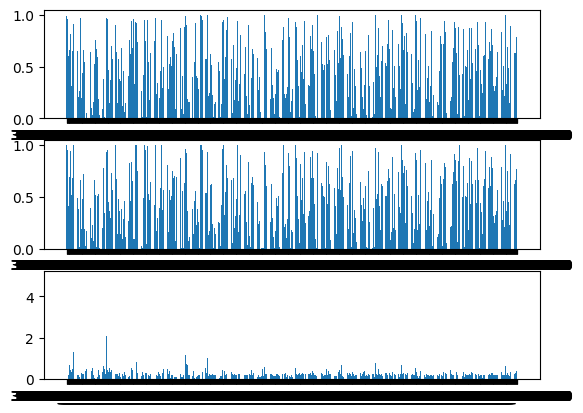

In [29]:
# plot of distributions
from matplotlib import pyplot

pyplot.subplot(3,1,1)
pyplot.bar(graph_df['X_axis'].to_list(), p)

pyplot.subplot(3,1,2)
pyplot.bar(graph_df['X_axis'].to_list(), q)

pyplot.subplot(3,1,3)
pyplot.bar(graph_df['X_axis'].to_list(), graph_df['[CALC_IV]'].to_list())

pyplot.show()

In [44]:
len(p)

1638

In [46]:
p[0:5]

[0.99117, 0.96528, 0.60437, 0.60437, 0.60437]

In [51]:
q[30:40]

[0.7674216587566967,
 0.4797511047658637,
 0.6995524825133111,
 0.9308569842828953,
 0.878436850613324,
 0.004567458641623585,
 0.6593316587888427,
 0.40309796670032316,
 0.00478887228072831,
 0.2527138228008913]

In [54]:
p[p == float('+inf')] = 0.0
p[p == float('-inf')] = 0.0

q[q == float('+inf')] = 0.0
q[q == float('-inf')] = 0.0

In [52]:
# KL(P || Q)
kl_delta = rel_entr(p, q)
sum(kl_delta)

inf

In [55]:
sum(kl_delta)

inf

In [39]:
# Shannon Entropy H(p)
H = entropy(p)

In [40]:
H

7.153114755584165

In [56]:
kl_delta[kl_delta == float('+inf')] = 0.0
kl_delta[kl_delta == float('-inf')] = 0.0

In [58]:
sum(kl_delta)

87.15199369428028

In [194]:
p

[0.0,
 1.60593,
 -3e-05,
 0.72004,
 0.29386,
 -0.00045,
 0.2313,
 0.48384,
 0.4758,
 0.51773,
 0.36418,
 0.21621,
 0.21038,
 1.05765,
 0.26841,
 0.79266,
 0.20504,
 0.30975,
 0.30169,
 0.14393,
 0.12489,
 0.16422,
 1.09128,
 0.16306,
 0.16306,
 0.32866,
 0.13739,
 0.25702,
 0.14467,
 0.17054,
 0.20529,
 0.18408,
 0.23056,
 0.3295,
 0.16724,
 0.31281,
 0.1704,
 0.47704,
 0.20575,
 0.30465,
 0.35259,
 0.13533,
 0.30645,
 0.20336,
 0.58942,
 0.35627,
 0.31042,
 0.31694,
 0.13188,
 0.16866,
 0.31957,
 0.1791,
 -9e-05,
 0.58248,
 0.26553,
 0.40577,
 0.41818,
 0.22069,
 0.52301,
 0.22929,
 0.22443,
 0.62918,
 0.37411,
 0.27252,
 0.29698,
 0.42446,
 0.22073,
 0.17108,
 0.27778,
 0.27076,
 0.5156,
 0.26344,
 0.3465,
 0.39535,
 0.1637,
 0.15339,
 0.33474,
 0.16723,
 0.21427,
 0.39427,
 0.38324,
 0.20284,
 0.30953,
 0.18951,
 0.66771,
 0.28789,
 0.94777,
 0.26725,
 -1e-05,
 0.17609,
 0.39735,
 0.25363,
 0.27689,
 0.45767,
 0.35685,
 0.17798,
 0.31696,
 0.2414,
 0.18626,
 0.27908,
 0.11224,
 0.28